In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
import random

import sys
import matplotlib
import sklearn
import numpy
import keras
import tensorflow as tf 
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Convolution2D, MaxPool2D
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import Callback

Using TensorFlow backend.


In [2]:
print('Versão Python ', sys.version)
print('Versão Numpy ', numpy.version.version)
print('Versão Pandas ', pd.__version__)
print('Versão Matplotlib ', matplotlib.__version__)
print('Versão Sklearn ', sklearn.__version__)
print('Versão Keras', keras.__version__)
print('Versão TensorFlow', tf.__version__)

Versão Python  3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:18:16) [MSC v.1916 64 bit (AMD64)]
Versão Numpy  1.17.4
Versão Pandas  0.25.3
Versão Matplotlib  3.1.2
Versão Sklearn  0.22.1
Versão Keras 2.3.1
Versão TensorFlow 2.0.0


#### Importando os dados

In [3]:
IdLookupTable = pd.read_csv('IdLookupTable.csv')
SampleSubmission = pd.read_csv('SampleSubmission.csv')
training = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

#### Remoção de registros com dados faltantes

In [4]:
training = training.dropna()

#### Convertendo os dados de cada imagem para uma matriz de inteiros e remodelando para uma matriz de dimsão 96x96

In [5]:
training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

#### Convertendo os dados da imagem em array e atribuindo para variável X

In [6]:
X = np.asarray([training['Image']], dtype=np.uint8).reshape(training.shape[0],96,96,1)

#### Cria um novo dataset chamado y, removendo a feature "Imagem"

In [7]:
y = training.drop(['Image'], axis=1)

#### Cria a variável y_ndarray convertendo a variável y para numpy.ndarray

In [8]:
y_ndarray = y.to_numpy()

#### Divide os dados do dataset em subconjuntos aleatórios de treino e teste

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ndarray, test_size=0.3, random_state=42)

#### Criação da variável do tipo sequential
https://keras.io/models/sequential/

In [10]:
model = Sequential()

#### Função para criar as camadas da rede neural convulacional
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Convolution2D: https://keras.io/layers/convolutional/#conv2d <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LeakyReLU: https://keras.io/layers/advanced-activations/#leakyrelu <br/>
BatchNormalization: https://keras.io/layers/normalization/#batchnormalization <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MaxPool2D: https://keras.io/layers/pooling/#maxpooling2d
 

In [11]:
def add_model(model, filters, maxpooling, *inputshape):   
    if inputshape:
        model.add(Convolution2D(filters, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
    else:
      if maxpooling:
        model.add(Convolution2D(filters, (3,3), padding='same', use_bias=False))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=(2, 2)))
      else:
        model.add(Convolution2D(filters, (3,3), padding='same', use_bias=False))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
    

#### Cria a primeira camada com inut_shape

In [12]:
add_model(model, 32, False, True)

#### Cria as camadas ocultas

In [13]:
add_model(model, 32, True)
add_model(model, 64, False)
add_model(model, 64, True)
add_model(model, 128, False)
add_model(model, 128, True)
add_model(model, 256, False)
add_model(model, 256, True)
add_model(model, 512, False)
add_model(model, 512, True)

#### Cria as camadas ocultas

In [14]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))

#### Configura o modelo para treinamento

In [15]:
model.compile(optimizer='Adam', loss='mse', metrics=['mae', 'acc'])

In [16]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'layer10_epoc300_kernel3p3_drop0p1.hdf5', monitor='val_mae', verbose=1, save_best_only=False)

In [17]:
history = model.fit(X_train, y_train, epochs=300, validation_split=0.02, callbacks=[checkpointer])

Train on 1468 samples, validate on 30 samples
Epoch 1/300
1468/1468 [==============================] - 221s 150ms/step - loss: 150.4307 - mae: 7.4685 - acc: 0.4223 - val_loss: 95.1134 - val_mae: 8.3110 - val_acc: 0.7667

Epoch 00001: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 2/300
1468/1468 [==============================] - 220s 150ms/step - loss: 26.1447 - mae: 4.0200 - acc: 0.5300 - val_loss: 10.5873 - val_mae: 2.5331 - val_acc: 0.7667

Epoch 00002: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 3/300
1468/1468 [==============================] - 193s 131ms/step - loss: 21.3176 - mae: 3.6269 - acc: 0.5715 - val_loss: 11.7878 - val_mae: 2.6322 - val_acc: 0.7667

Epoch 00003: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 4/300
1468/1468 [==============================] - 204s 139ms/step - loss: 19.0282 - mae: 3.4188 - acc: 0.5879 - val_loss: 7.6137 - val_mae: 2.1619 - val_acc: 0.7667

Epoch 00004: saving model to layer10_epoc100_kernel3p3

Epoch 35/300
1468/1468 [==============================] - 184s 125ms/step - loss: 7.4161 - mae: 2.0971 - acc: 0.7643 - val_loss: 13.1962 - val_mae: 3.2242 - val_acc: 0.9000

Epoch 00035: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 36/300
1468/1468 [==============================] - 185s 126ms/step - loss: 5.9447 - mae: 1.8752 - acc: 0.7800 - val_loss: 2.4631 - val_mae: 1.1467 - val_acc: 0.8000

Epoch 00036: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 37/300
1468/1468 [==============================] - 194s 132ms/step - loss: 5.8858 - mae: 1.8633 - acc: 0.7704 - val_loss: 2.0121 - val_mae: 1.0188 - val_acc: 0.9000

Epoch 00037: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 38/300
1468/1468 [==============================] - 183s 125ms/step - loss: 5.5269 - mae: 1.8218 - acc: 0.8052 - val_loss: 2.9979 - val_mae: 1.2780 - val_acc: 0.8000

Epoch 00038: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 39/300
1468/1468 [===========

Epoch 69/300
1468/1468 [==============================] - 184s 125ms/step - loss: 4.4339 - mae: 1.6201 - acc: 0.8277 - val_loss: 1.9408 - val_mae: 1.0061 - val_acc: 0.8000

Epoch 00069: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 70/300
1468/1468 [==============================] - 183s 125ms/step - loss: 4.1957 - mae: 1.5629 - acc: 0.8256 - val_loss: 2.0761 - val_mae: 1.0097 - val_acc: 0.8000

Epoch 00070: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 71/300
1468/1468 [==============================] - 192s 131ms/step - loss: 4.5047 - mae: 1.6275 - acc: 0.8263 - val_loss: 2.1630 - val_mae: 1.0734 - val_acc: 0.9333

Epoch 00071: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 72/300
1468/1468 [==============================] - 185s 126ms/step - loss: 5.5001 - mae: 1.8137 - acc: 0.8181 - val_loss: 4.4037 - val_mae: 1.6246 - val_acc: 0.8333

Epoch 00072: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 73/300
1468/1468 [============

Epoch 103/300
1468/1468 [==============================] - 183s 125ms/step - loss: 4.6333 - mae: 1.6607 - acc: 0.8522 - val_loss: 1.8908 - val_mae: 0.9580 - val_acc: 0.8000

Epoch 00103: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 104/300
1468/1468 [==============================] - 184s 125ms/step - loss: 4.1385 - mae: 1.5573 - acc: 0.8249 - val_loss: 3.6801 - val_mae: 1.5527 - val_acc: 0.8333

Epoch 00104: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 105/300
1468/1468 [==============================] - 184s 125ms/step - loss: 3.6587 - mae: 1.4749 - acc: 0.8529 - val_loss: 1.9680 - val_mae: 1.0047 - val_acc: 0.8333

Epoch 00105: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 106/300
1468/1468 [==============================] - 184s 125ms/step - loss: 3.5004 - mae: 1.4298 - acc: 0.8515 - val_loss: 3.3708 - val_mae: 1.4467 - val_acc: 0.8667

Epoch 00106: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 107/300
1468/1468 [=======

Epoch 137/300
1468/1468 [==============================] - 187s 127ms/step - loss: 3.3828 - mae: 1.4019 - acc: 0.8495 - val_loss: 2.1324 - val_mae: 1.0426 - val_acc: 0.8667

Epoch 00137: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 138/300
1468/1468 [==============================] - 185s 126ms/step - loss: 3.5416 - mae: 1.4461 - acc: 0.8440 - val_loss: 3.5407 - val_mae: 1.5326 - val_acc: 0.7667

Epoch 00138: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 139/300
1468/1468 [==============================] - 196s 133ms/step - loss: 3.2799 - mae: 1.3863 - acc: 0.8535 - val_loss: 1.8371 - val_mae: 0.9741 - val_acc: 0.8000

Epoch 00139: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 140/300
1468/1468 [==============================] - 184s 125ms/step - loss: 3.8598 - mae: 1.5146 - acc: 0.8706 - val_loss: 2.5982 - val_mae: 1.2919 - val_acc: 0.8000

Epoch 00140: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 141/300
1468/1468 [=======

Epoch 171/300
1468/1468 [==============================] - 187s 128ms/step - loss: 4.0610 - mae: 1.5511 - acc: 0.8549 - val_loss: 1.8012 - val_mae: 0.9515 - val_acc: 0.8333

Epoch 00171: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 172/300
1468/1468 [==============================] - 184s 125ms/step - loss: 3.4830 - mae: 1.4372 - acc: 0.8474 - val_loss: 2.4767 - val_mae: 1.1808 - val_acc: 0.9333

Epoch 00172: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 173/300
1468/1468 [==============================] - 183s 125ms/step - loss: 3.7198 - mae: 1.4840 - acc: 0.8638 - val_loss: 2.6811 - val_mae: 1.2579 - val_acc: 0.6000

Epoch 00173: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 174/300
1468/1468 [==============================] - 184s 126ms/step - loss: 4.7110 - mae: 1.6764 - acc: 0.8522 - val_loss: 2.3907 - val_mae: 1.1673 - val_acc: 0.9000

Epoch 00174: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 175/300
1468/1468 [=======

Epoch 205/300
1468/1468 [==============================] - 184s 125ms/step - loss: 3.7018 - mae: 1.4682 - acc: 0.8638 - val_loss: 1.8550 - val_mae: 0.9934 - val_acc: 0.8000

Epoch 00205: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 206/300
1468/1468 [==============================] - 190s 129ms/step - loss: 3.1095 - mae: 1.3534 - acc: 0.8678 - val_loss: 1.7160 - val_mae: 0.9298 - val_acc: 0.8333

Epoch 00206: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 207/300
1468/1468 [==============================] - 192s 131ms/step - loss: 3.5886 - mae: 1.4587 - acc: 0.8556 - val_loss: 2.4390 - val_mae: 1.1723 - val_acc: 0.8667

Epoch 00207: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 208/300
1468/1468 [==============================] - 184s 125ms/step - loss: 3.1293 - mae: 1.3639 - acc: 0.8706 - val_loss: 3.1876 - val_mae: 1.4289 - val_acc: 0.7667

Epoch 00208: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 209/300
1468/1468 [=======

Epoch 239/300
1468/1468 [==============================] - 185s 126ms/step - loss: 3.4920 - mae: 1.4359 - acc: 0.8495 - val_loss: 3.6931 - val_mae: 1.5839 - val_acc: 0.8000

Epoch 00239: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 240/300
1468/1468 [==============================] - 184s 125ms/step - loss: 3.6436 - mae: 1.4662 - acc: 0.8692 - val_loss: 1.7185 - val_mae: 0.9320 - val_acc: 0.8333

Epoch 00240: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 241/300
1468/1468 [==============================] - 184s 125ms/step - loss: 3.2156 - mae: 1.3751 - acc: 0.8542 - val_loss: 2.0748 - val_mae: 1.0744 - val_acc: 0.8333

Epoch 00241: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 242/300
1468/1468 [==============================] - 188s 128ms/step - loss: 3.2701 - mae: 1.3909 - acc: 0.8699 - val_loss: 1.8468 - val_mae: 0.9971 - val_acc: 0.8667

Epoch 00242: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 243/300
1468/1468 [=======

Epoch 273/300
1468/1468 [==============================] - 236s 161ms/step - loss: 3.4196 - mae: 1.4250 - acc: 0.8747 - val_loss: 3.0337 - val_mae: 1.4007 - val_acc: 0.9000

Epoch 00273: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 274/300
1468/1468 [==============================] - 227s 154ms/step - loss: 3.4943 - mae: 1.4323 - acc: 0.8624 - val_loss: 1.9412 - val_mae: 1.0445 - val_acc: 0.8667

Epoch 00274: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 275/300
1468/1468 [==============================] - 205s 139ms/step - loss: 4.0200 - mae: 1.5558 - acc: 0.8624 - val_loss: 1.8594 - val_mae: 0.9571 - val_acc: 0.8333

Epoch 00275: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 276/300
1468/1468 [==============================] - 219s 149ms/step - loss: 3.0924 - mae: 1.3462 - acc: 0.8583 - val_loss: 2.4251 - val_mae: 1.2053 - val_acc: 0.8667

Epoch 00276: saving model to layer10_epoc100_kernel3p3_drop0p1.hdf5
Epoch 277/300
1468/1468 [=======

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.696862528257281
Test accuracy: 1.5585521459579468


In [32]:
score

[3.696862528257281, 1.5585521459579468, 0.8146417737007141]

In [19]:
test['Image'] = test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))
test_X = np.asarray([test['Image']], dtype=np.uint8).reshape(test.shape[0],96,96,1)
train_predicts = model.predict(X_train)

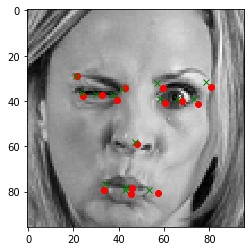

In [20]:
plt.imshow(X_train[0].reshape((96,96)), cmap='gray')

for i in range(1,31,2):
    plt.plot(train_predicts[0][i-1], train_predicts[0][i], 'ro')
    plt.plot(y_train[0][i-1], y_train[0][i], 'x', color='green')

plt.show()

#### Loss vs Epoch

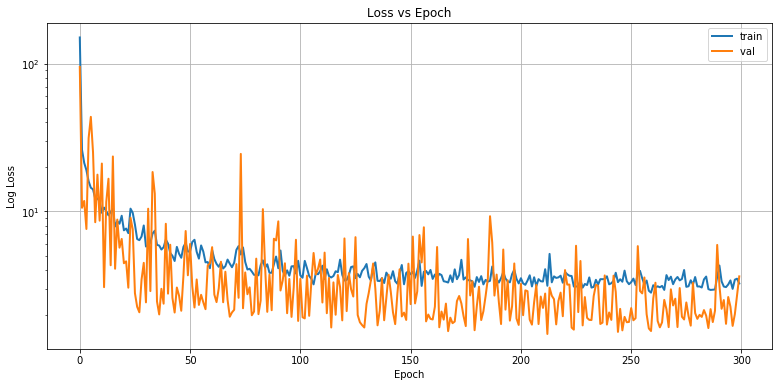

<Figure size 1440x1080 with 0 Axes>

In [31]:
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'], linewidth=2, label="train")
plt.plot(history.history['val_loss'], linewidth=2, label="val ")
plt.legend()
plt.title('Loss vs Epoch')
plt.grid()
plt.yscale('log')
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
fig= plt.figure(figsize=(20,15))
plt.show()

#### Mean Absolute Error vs Epoch

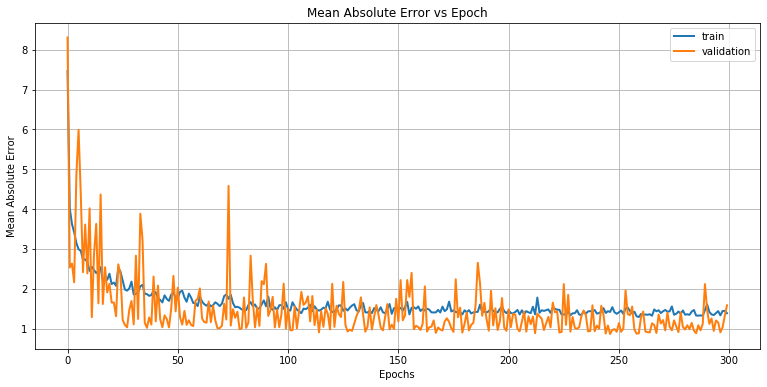

In [22]:
plt.figure(figsize=(13,6))
plt.plot(history.history['mae'], linewidth=2)
plt.plot(history.history['val_mae'], linewidth=2)
plt.title('Mean Absolute Error vs Epoch')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.grid()
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#### Accuracy vs Epoch

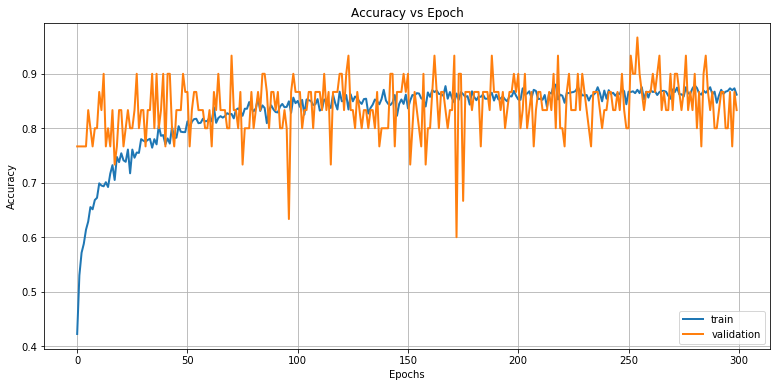

In [23]:
plt.figure(figsize=(13,6))
plt.plot(history.history['acc'], linewidth=2)
plt.plot(history.history['val_acc'], linewidth=2)
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend(['train', 'validation'], loc='lower right')
plt.show()


In [24]:
predict = model.predict(test_X)

In [25]:
header = list(y.columns)

In [26]:
df_predict = pd.DataFrame(predict, columns = header)

In [27]:
for i in range(IdLookupTable.shape[0]):
    IdLookupTable.Location[i] = df_predict.loc[IdLookupTable.ImageId[i]-1][IdLookupTable.FeatureName[i]]

c:\users\alexandre\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
SampleSubmission.Location = IdLookupTable.Location

In [29]:
SampleSubmission.to_csv('submission_300_epochs_kernel3x3.csv', index=False)

In [30]:
pd.DataFrame(history.history.items()).to_csv('history_submission_300_epochs_kernel3x3.csv', index=False)